In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

df= pd.read_excel('output_params_Phase.xlsx')

# # FCC=0, FCC+BCC=1, BCC=2

data= df.drop('Phase',axis='columns')
target= df['Phase']

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(data,target,test_size=0.2,random_state=42)

In [2]:
from sklearn.svm import SVC

In [7]:
#SVM
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1, 100,1000],
    "kernel":['linear','poly','rbf'],
    'gamma' : ['scale']
}
clf = SVC()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy', verbose=3)
grid.fit(xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ...C=1, gamma=scale, kernel=linear;, score=0.975 total time=   1.4s
[CV 2/3] END ...C=1, gamma=scale, kernel=linear;, score=0.974 total time=   1.3s
[CV 3/3] END ...C=1, gamma=scale, kernel=linear;, score=0.977 total time=   1.1s
[CV 1/3] END .....C=1, gamma=scale, kernel=poly;, score=0.744 total time=   2.9s
[CV 2/3] END .....C=1, gamma=scale, kernel=poly;, score=0.753 total time=   3.0s
[CV 3/3] END .....C=1, gamma=scale, kernel=poly;, score=0.746 total time=   2.9s
[CV 1/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.720 total time=   7.1s
[CV 2/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.727 total time=   7.4s
[CV 3/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.722 total time=   7.3s
[CV 1/3] END .C=100, gamma=scale, kernel=linear;, score=0.973 total time=   1.6s
[CV 2/3] END .C=100, gamma=scale, kernel=linear;, score=0.975 total time=   1.7s
[CV 3/3] END .C=100, gamma=scale, kernel=linear;,

In [8]:
grid.score(xtest, ytest)

0.9761345852895149

In [9]:
ypred= grid.predict(xtest)

Text(0, 0.5, 'actual phase\n              (BCC= 2, FCC+BCC= 1, FCC= 0)  ')

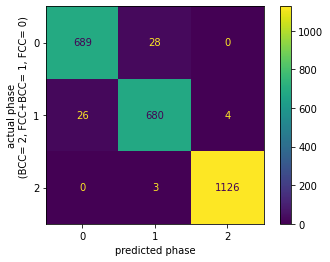

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(grid, xtest, ytest)
plt.xlabel('predicted phase')
plt.ylabel('''actual phase
              (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')


In [11]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       717
           1       0.96      0.96      0.96       710
           2       1.00      1.00      1.00      1129

    accuracy                           0.98      2556
   macro avg       0.97      0.97      0.97      2556
weighted avg       0.98      0.98      0.98      2556



In [12]:
from sklearn.inspection import permutation_importance


pi= permutation_importance(grid, xtrain, ytrain, random_state=42)
result=pi.importances_mean

fi = pd.DataFrame(result, index= xtrain.columns, columns= ['importance']).sort_values('importance', ascending=False)

print(fi)

       importance
Tm       0.478783
Ni       0.384095
Al       0.224533
Cr       0.224337
Co       0.128142
ΔHₘᵢₓ    0.101536
Fe       0.070782
Ω        0.046757
δ        0.022850
Δsₘᵢₓ    0.009156
Δχ       0.000020
VEC     -0.000685
